This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.This is a systematic approach for identifying and analyzing patterns and trends in crime using USArrest dataset.
Since the dataset is 'unlabelled' ,  it is better to approach unsupervised machine learning algorithms to perform on the basis of dataset.

Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group

The various types of clustering are:

* Hierarchical clustering
* Partitioning clustering 

Hierarchical clustering is further subdivided into:
* Agglomerative clustering
* Divisive clustering

Partitioning clustering is further subdivided into:

* K-Means clustering 
* Fuzzy C-Means clustering

Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

Clustering Algorithms

* Affinity Propagation
* Agglomerative Clustering
* BIRCH
* DBSCAN
* K-Means
* Mini-Batch K-Means
* Mean Shift
* OPTICS
* Spectral Clustering
* Gaussian Mixture Model

**Importing Nescessary Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
!pip install sunbird
!pip install neptune-notebooks
!pip install -U scikit-learn

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 829 kB 46.5 MB/s 
     |████████████████████████████████| 316 kB 59.3 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 181 kB 34.2 MB/s 
     |████████████████████████████████| 132 kB 33.3 MB/s 
     |████████████████████████████████| 8.8 MB 45.5 MB/s 
     |████████████████████████████████| 79 kB 6.3 MB/s 
     |████████████████████████████████| 138 kB 72.1 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 127 kB 57.7 MB/s 
     |████████████████████████████████| 67 kB 4.4 MB/s 
     |████████████████████████████████| 130 kB 60.7 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for neptune-notebooks: filename=neptune_notebooks-0.9.0-py2.py3-none-any.whl size=1026884 sha256=334bcd27bdca16972373e0648c35b7f88ba460081521e424b7ad410cd6aa22b1
  Stored in directory

**Reading & performing basic EDA to our data:**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/USArrests.csv')

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head()

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cities    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
df.shape

(50, 5)

In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
df.isnull().sum()

Cities      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
df.dtypes

Cities       object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [ ]:
df.duplicated().sum()

0

**Visualizing the correlation between the Columns**

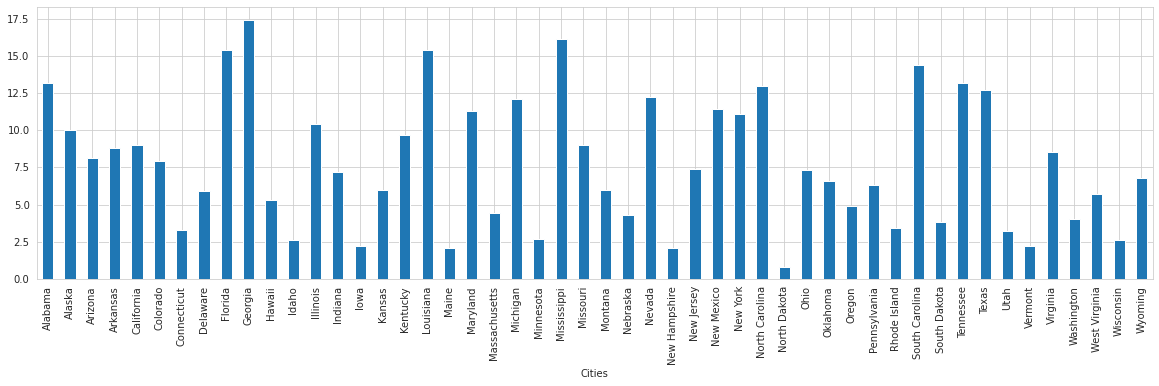

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
df.groupby('Cities')['Murder'].max().plot(kind='bar')

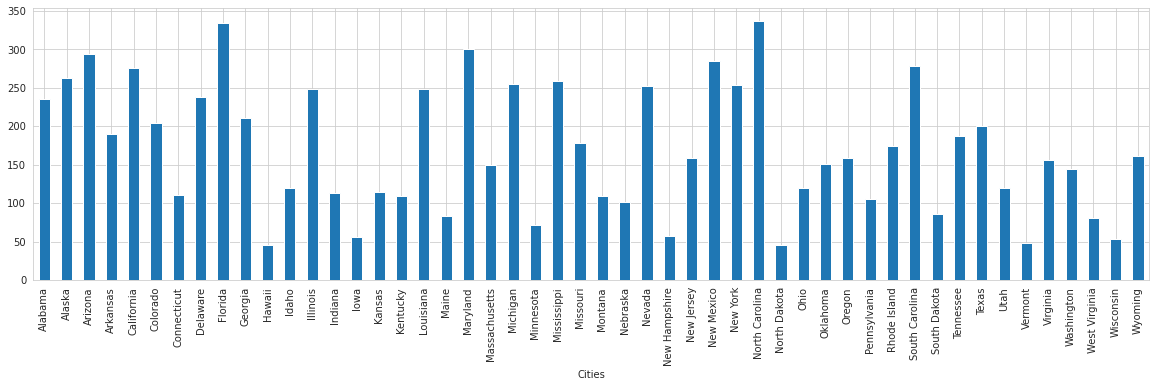

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
df.groupby('Cities')['Assault'].max().plot(kind='bar')

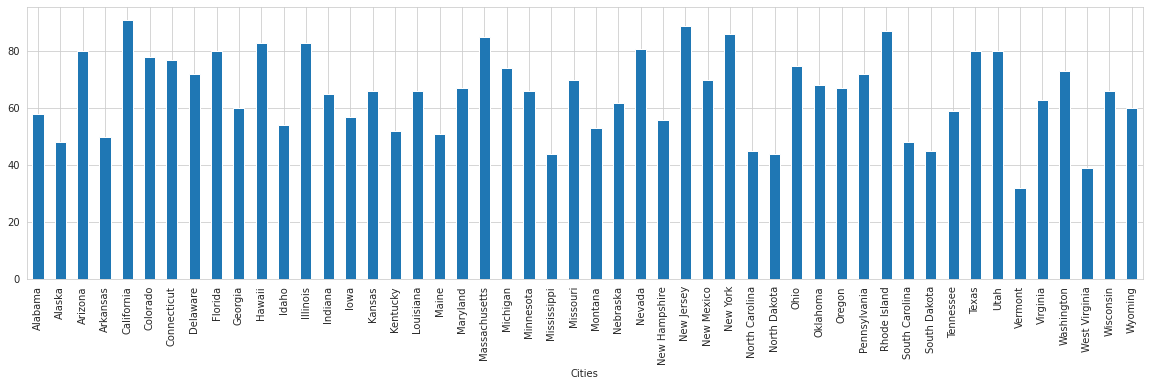

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
df.groupby('Cities')['UrbanPop'].max().plot(kind='bar')

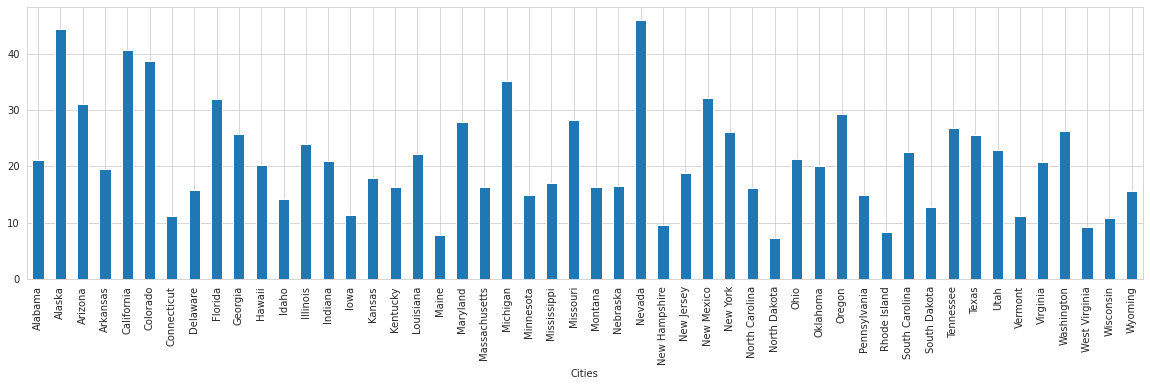

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,5))
df.groupby('Cities')['Rape'].max().plot(kind='bar')

**Visualizing the data using clustermap**

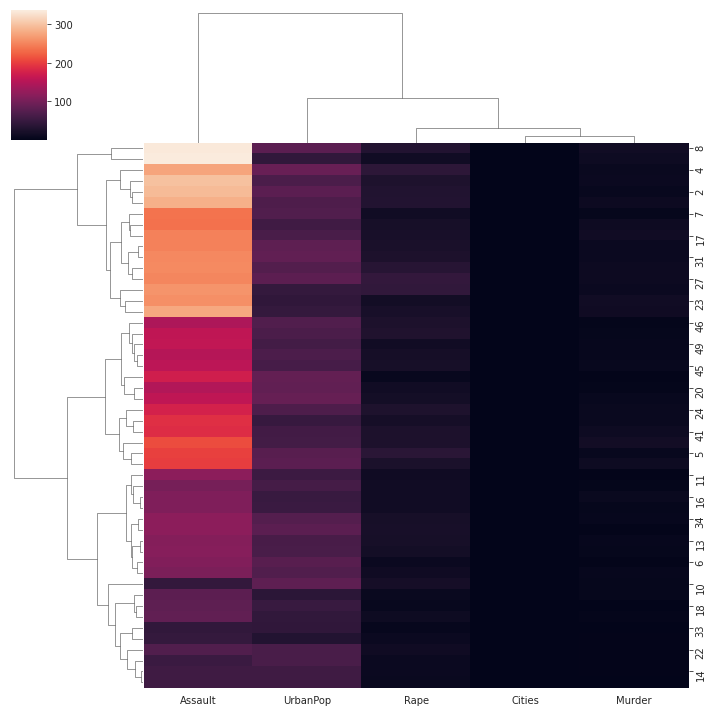

In [ ]:
from sunbird.categorical_encoding import frequency_encoding
frequency_encoding(df, 'Cities')
sns.clustermap(df, figsize=(10, 10))

**Calculating Euclidean distance in between features**

In [ ]:
dist = ((df['Assault'] - df['Cities'])**2)
E_dist=np.sqrt(dist)
print("Euclidean Distance between Murder and Cities",E_dist)

Euclidean Distance between Murder and Cities 0     235.0
1     262.0
2     293.0
3     189.0
4     275.0
5     203.0
6     109.0
7     237.0
8     334.0
9     210.0
10     45.0
11    119.0
12    248.0
13    112.0
14     55.0
15    114.0
16    108.0
17    248.0
18     82.0
19    299.0
20    148.0
21    254.0
22     71.0
23    258.0
24    177.0
25    108.0
26    101.0
27    251.0
28     56.0
29    158.0
30    284.0
31    253.0
32    336.0
33     44.0
34    119.0
35    150.0
36    158.0
37    105.0
38    173.0
39    278.0
40     85.0
41    187.0
42    200.0
43    119.0
44     47.0
45    155.0
46    144.0
47     80.0
48     52.0
49    160.0
dtype: float64


In [ ]:
dist = ((df['Murder'] - df['Cities'])**2)
E_dist=np.sqrt(dist)
print("Euclidean Distance between Murder and Cities",E_dist)

Euclidean Distance between Murder and Cities 0     12.2
1      9.0
2      7.1
3      7.8
4      8.0
5      6.9
6      2.3
7      4.9
8     14.4
9     16.4
10     4.3
11     1.6
12     9.4
13     6.2
14     1.2
15     5.0
16     8.7
17    14.4
18     1.1
19    10.3
20     3.4
21    11.1
22     1.7
23    15.1
24     8.0
25     5.0
26     3.3
27    11.2
28     1.1
29     6.4
30    10.4
31    10.1
32    12.0
33     0.2
34     6.3
35     5.6
36     3.9
37     5.3
38     2.4
39    13.4
40     2.8
41    12.2
42    11.7
43     2.2
44     1.2
45     7.5
46     3.0
47     4.7
48     1.6
49     5.8
dtype: float64


In [ ]:
dist = ((df['UrbanPop'] - df['Cities'])**2)
E_dist=np.sqrt(dist)
print("Euclidean Distance between UrbanPop and Cities",E_dist)

Euclidean Distance between UrbanPop and Cities 0     57.0
1     47.0
2     79.0
3     49.0
4     90.0
5     77.0
6     76.0
7     71.0
8     79.0
9     59.0
10    82.0
11    53.0
12    82.0
13    64.0
14    56.0
15    65.0
16    51.0
17    65.0
18    50.0
19    66.0
20    84.0
21    73.0
22    65.0
23    43.0
24    69.0
25    52.0
26    61.0
27    80.0
28    55.0
29    88.0
30    69.0
31    85.0
32    44.0
33    43.0
34    74.0
35    67.0
36    66.0
37    71.0
38    86.0
39    47.0
40    44.0
41    58.0
42    79.0
43    79.0
44    31.0
45    62.0
46    72.0
47    38.0
48    65.0
49    59.0
dtype: float64


**Plotting dendogram**

Text(0, 0.5, 'Euclidean distances')

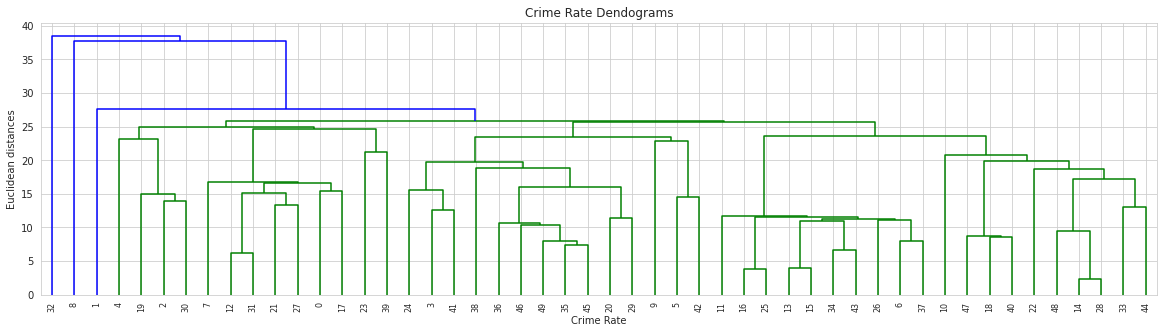

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(df, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

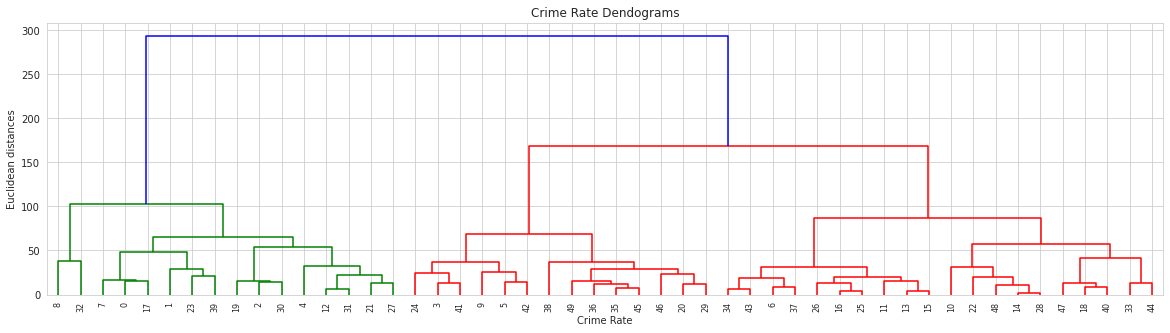

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(df, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

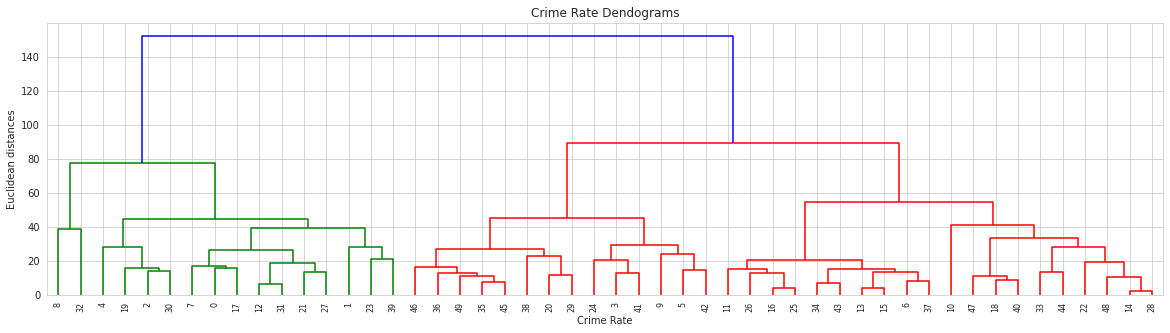

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(df, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

*Reading the values*

In [ ]:
data= df.iloc[:,1:].values
data

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

**Agglomerative Clustering :**
 is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.
 
 Agglomerative clustering uses a bottom-up approach, wherein each data point starts in its own cluster. These clusters are then joined greedily, by taking the two most similar clusters together and merging them. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [ ]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [ ]:
# Fetch the cluster labels
df['cluster labels']= y_pred

In [ ]:
# Let's see which cities falls in which cluster
df[['Cities','cluster labels']]

,Cities,cluster labels
0,1,1
1,1,1
2,1,1
3,1,2
4,1,1
5,1,2
6,1,0
7,1,1
8,1,1
9,1,2


In [ ]:
Safe_Zone= df.groupby('cluster labels')['Cities'].unique()

In [ ]:
Danger_Zone= df.groupby('cluster labels')['Cities'].unique()

In [ ]:
Moderate_Zone= df.groupby('cluster labels')['Cities'].unique()

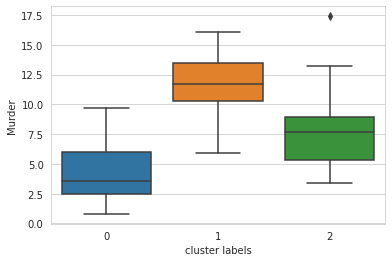

In [ ]:
sns.boxplot(x='cluster labels', y='Murder', data=df)

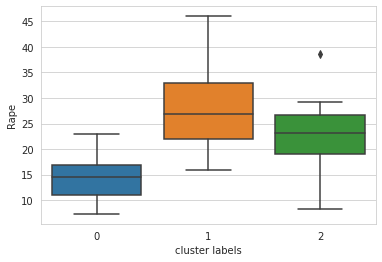

In [ ]:
sns.boxplot(x='cluster labels', y='Rape', data=df)

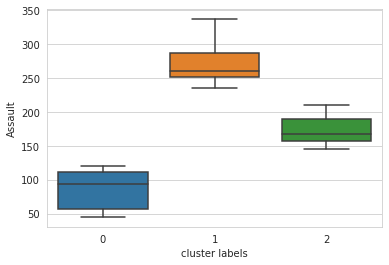

In [ ]:
sns.boxplot(x='cluster labels', y='Assault', data=df)

INFERENCE:
 * The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

*  The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

* The Cities in Cluster-2 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

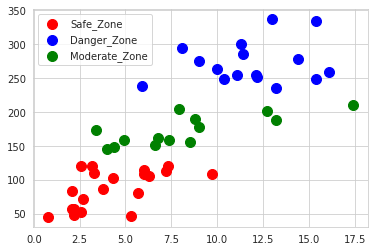

In [ ]:
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()

***Silhouette Coefficient*** or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=y_pred, metric='euclidean', sample_size=None, random_state=None)
score

0.5320343512332179

***Davies Bouldin score*** is used to defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

In [ ]:
#Performance Metric using Davies Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=df,labels=y_pred)
db_score

0.5972454676390089

***The Calinski-Harabasz*** index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

In [ ]:
#Performance Metric using Calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,y_pred)
c_score

150.84366658874904

In [ ]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
sc=SC.fit_transform(df)

***K - means Clustering:***

k-means clustering is an unsupervised, iterative, and prototype-based clustering method where all data points are grouped into k number of clusters, each of which is represented by its centroids (prototype). The centroid of a cluster is often a mean of all data points in that cluster.

In [ ]:
#Performing K means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

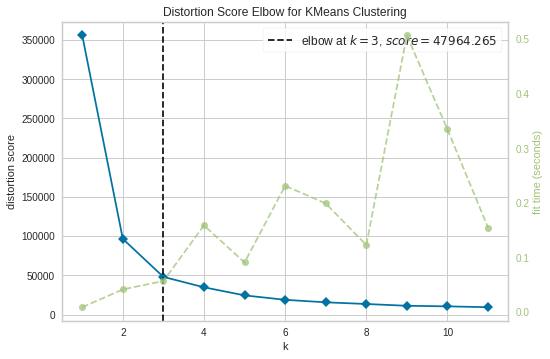

In [ ]:
#Visualizing using KElbow 
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

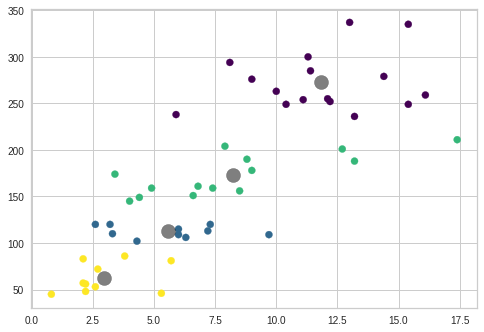

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
#Performance Metric using Davies Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=df,labels=y_kmeans)
db_score

0.5868884501745439

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=y_kmeans, metric='euclidean', sample_size=None, random_state=None)
score

0.5013867638254176

In [ ]:
#Performance Metric using Calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,y_kmeans)
c_score

141.7771062530512

**Meanshift Clustering:**

It is falling under the category of a clustering algorithm in contrast of Unsupervised learning that assigns the data points to the clusters iteratively by shifting points towards the mode (mode is the highest density of data points in the region, in the context of the Meanshift). As such, it is also known as the Mode-seeking algorithm. Mean-shift algorithm has applications in the field of image processing and computer vision.
Mean-shift builds upon the concept of kernel density estimation, in short KDE.

In [ ]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(sc)
cluster_centers = ms.fit_predict(sc)

In [ ]:
#Performance Metric using Davies Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=df,labels=cluster_centers)
db_score

0.5866756482034636

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=cluster_centers, metric='euclidean', sample_size=None, random_state=None)
score

0.5220211524915945

In [ ]:
#Performance Metric using Calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,cluster_centers)
c_score

92.08568548777552

**Spectral clustering**:

It is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them. 

In [ ]:
from sklearn.cluster import SpectralClustering
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(sc)


In [ ]:
#Performance Metric using Davies Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=df,labels=labels_rbf)
db_score

0.5866756482034636

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=labels_rbf, metric='manhattan', sample_size=None, random_state=None)
score

0.49098874609536486

In [ ]:
#Performance Metric using Calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,labels_rbf)
c_score

92.08568548777552

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)

# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
GMM=gmm.fit(sc)
gmm = GMM.predict(sc)

In [ ]:
#Performance Metric using Davies Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=data,labels=gmm)
db_score

0.6703748309666339

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=gmm, metric='euclidean', sample_size=None, random_state=None)
score

0.4320454494941091

In [ ]:
#Performance Metric using Calinski harabasz score
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,gmm)
c_score

106.56289442880629

**Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH)**:
It is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset.

In [ ]:
#Birch clustering
from sklearn.cluster import Birch
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
model.fit(sc)
pred_birch = model.predict(sc)

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=pred_birch, metric='manhattan', sample_size=None, random_state=None)
score

0.3240865869684979

In [ ]:
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,pred_birch)
c_score

74.29211791440835

In [ ]:
#Performance Metric using Davies Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=df,labels=pred_birch)
db_score

1.6266901465429118

**Affinity propagation:** 
An algorithm that identifies exemplars among data points and forms clusters of data points around these exemplars. It operates by simultaneously considering all data point as potential exemplars and exchanging messages between data points until a good set of exemplars and clusters emerges.

In [ ]:
#Affinity Propagation clustering
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation(preference =-50).fit(sc)
cluster_centers_indices = af.cluster_centers_indices_
Labels = af.labels_
n_clusters_ = len(cluster_centers_indices)
# Predict the cluster for all the samples
AP = af.predict(sc)
AP

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0])

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=AP, metric='manhattan', sample_size=None, random_state=None)
score

0.49098874609536486

In [ ]:
#Performance Metric using Davies Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=df,labels=AP)
db_score

0.5866756482034636

In [ ]:
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,AP)
c_score

92.08568548777552

**Mini Batch K-means algorithm:**

It's main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence.

In [ ]:
#mini batch k means clustering
# perform the mini batch K-means

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4, n_init = 10,
                      max_no_improvement = 10, verbose = 0)
  
mbk.fit(data)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
mbk_means_labels = pairwise_distances_argmin(data, mbk_means_cluster_centers)
print(mbk_means_labels)

[2 3 3 2 3 2 1 2 3 2 0 1 3 1 0 1 1 3 0 3 1 3 0 3 2 1 1 3 0 1 3 3 3 0 1 1 1
 1 2 3 0 2 2 1 0 1 1 0 0 1]


In [ ]:
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=df,labels=mbk_means_labels)
db_score

0.6864270052718334

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=mbk_means_labels, metric='manhattan', sample_size=None, random_state=None)
score

0.39522112173896573

In [ ]:
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,mbk_means_labels)
c_score

131.91414872976964

***OPTICS Clustering***

It stands for Ordering Points To Identify Cluster Structure. It draws inspiration from the DBSCAN clustering algorithmOPTICS works by ordering based on reachability distance while expanding the clusters at the same time. The output of the OPTICS algorithm is therefore an ordered list of reachability distances, which by means of thresholds or different techniques we can split into clusters.

In [ ]:
#optics clustering
from sklearn.cluster import OPTICS, cluster_optics_dbscan
# Building the OPTICS Clustering model
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)
  
# Training the model
optics=optics_model.fit(sc)
optics_pred=optics.fit_predict(sc)

In [ ]:
#Performance Metrics using Silhouette coeffiecient
from sklearn.metrics import silhouette_score
score=silhouette_score(df, labels=optics_pred, metric='euclidean', sample_size=None, random_state=None)
score

0.38752959444620144

In [ ]:
#Performance Metric using Davies Bouldin score
from sklearn.metrics import davies_bouldin_score
db_score=davies_bouldin_score(X=df,labels=optics_pred)
db_score

0.6292963450159514

In [ ]:
from sklearn.metrics import calinski_harabasz_score
c_score=calinski_harabasz_score(df,optics_pred)
c_score

95.23082432131162